In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)
  def __init__(self, in_features=4, h1 = 8, h2 = 8, out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [8]:
# Pick a manual seed for randomzation
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [12]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
# Change last column from string to float
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:
#Train Test Split! Sex X, y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']


In [15]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [18]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go downa fter a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [38]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 1000
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thrue the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.0009089594823308289
Epoch: 10 and loss: 0.0008893460035324097
Epoch: 20 and loss: 0.0008712074486538768
Epoch: 30 and loss: 0.0008536098757758737
Epoch: 40 and loss: 0.0008364915265701711
Epoch: 50 and loss: 0.000819728767964989
Epoch: 60 and loss: 0.0008034936618059874
Epoch: 70 and loss: 0.0007877468597143888
Epoch: 80 and loss: 0.0007721775909885764
Epoch: 90 and loss: 0.0007571051246486604
Epoch: 100 and loss: 0.000742451346013695
Epoch: 110 and loss: 0.0007282098522409797
Epoch: 120 and loss: 0.0007141565438359976
Epoch: 130 and loss: 0.0007005386287346482
Epoch: 140 and loss: 0.0006872006342746317
Epoch: 150 and loss: 0.0006743234116584063
Epoch: 160 and loss: 0.0006624361267313361
Epoch: 170 and loss: 0.0006495698471553624
Epoch: 180 and loss: 0.0006373982760123909
Epoch: 190 and loss: 0.0006255839834921062
Epoch: 200 and loss: 0.0006141809863038361
Epoch: 210 and loss: 0.0006029392825439572
Epoch: 220 and loss: 0.0005919784889556468
Epoch: 230 and loss: 0.0

Text(0.5, 0, 'Epochs')

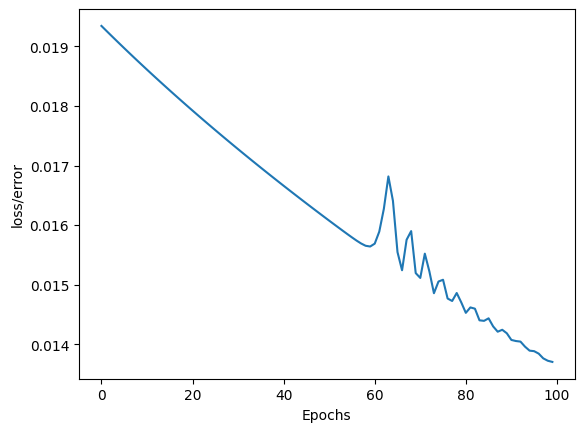

In [26]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [39]:

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-16.3640,   0.9456,  17.8644]) 	 2 	 2
2.)  tensor([-23.3645, -11.1027,  35.7294]) 	 2 	 2
3.)  tensor([-26.9972, -13.1092,  41.5656]) 	 2 	 2
4.)  tensor([ -1.5815,  17.4553, -12.2424]) 	 1 	 1
5.)  tensor([-22.0739,  -6.5142,  30.5250]) 	 2 	 2
6.)  tensor([  5.5270,  20.9294, -23.0170]) 	 1 	 1
7.)  tensor([-17.0601,   1.1526,  18.5047]) 	 2 	 2
8.)  tensor([ -1.2366,  17.6160, -12.7594]) 	 1 	 1
9.)  tensor([-19.4691,  -2.5064,  24.2603]) 	 2 	 2
10.)  tensor([-25.0847, -12.7249,  39.0315]) 	 2 	 2
11.)  tensor([-15.0259,   5.0104,  13.0194]) 	 2 	 2
12.)  tensor([  62.4868,   50.3614, -110.9858]) 	 0 	 0
13.)  tensor([  57.4464,   46.3165, -102.0687]) 	 0 	 0
14.)  tensor([ 11.5789,  21.4393, -30.2714]) 	 1 	 1
15.)  tensor([ 53.6188,  44.3342, -95.9088]) 	 0 	 0
16.)  tensor([-11.3565,  12.6866,   2.5675]) 	 2 	 1
17.)  tensor([  57.6771,   46.5064, -102.4754]) 	 0 	 0
18.)  tensor([-15.7201,   2.8945,  15.5407]) 	 1 	 2
19.)  tensor([  66.0249,   53.1937, -117.2472]

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  y_val =